# Flight Fare Prediction

# Introduction

- The project is based on 'Prediction on flight price' a hackathon hosted on machinehack.com.

# Problem Statement

- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. 
- We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. 
- Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
- We have to predict the prices

# Dataset Description

- We will be using two datasets — Train data and Test data
- Training data is combination of both categorical and numerical also we can see some special character also being used because of which we have to do data Transformation on it before applying it to our model.
- The test data is similar to the training data set, minus the 'Price' column (To be predicted using the model).
    - Size of training set: 10683 records
    - Size of test set: 2671 records

**FEATURES:**

    1. Airline: The name of the airline.

    2. Date_of_Journey: The date of the journey

    3. Source: The source from which the service begins.

    4. Destination: The destination where the service ends.

    5. Route: The route taken by the flight to reach the destination.

    6. Dep_Time: The time when the journey starts from the source.

    7. Arrival_Time: Time of arrival at the destination.

    8. Duration: Total duration of the flight.

    9. Total_Stops: Total stops between the source and destination.

    10. Additional_Info: Additional information about the flight

    11. Price: The price of the ticket

# 1.  Importing Dependencies

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Basic Libraries ##
import numpy as np
import pandas as pd


## Plotting Libraries ##
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn libraries ##
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

## Other Libraries ##
from tqdm import tqdm
from collections import Counter
import calendar
from datetime import datetime
from scipy import stats

# 2. Data Reading and Analysis

# For Training Data

In [2]:
train_data = pd.read_excel('train_data.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Displaying the info of each column
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Observations:**
- As there is only one value missing in the dataset. Simply remove that value.

In [4]:
# Checking missing values in dataset
print(train_data.isnull().values.any())

True


In [5]:
print(train_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [6]:
# Dropping all the rows having NaN values
train_data.dropna(inplace = True)

In [7]:
# Checking for Duplicates in the dataset
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [8]:
# Dropping all the Duplicate Rows
train_data.drop_duplicates(inplace = True)

In [9]:
# Shape of Data
print('Shape of Train Data after removal of NaN and Duplicates :', train_data.shape)

Shape of Train Data after removal of NaN and Duplicates : (10462, 11)


In [10]:
# Unique values in the 'Additional_Info' column of dataset
train_data['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [11]:
# Convert No Info in No info because both are same
train_data["Additional_Info"] = train_data["Additional_Info"].replace({'No Info': 'No info'})

### Feature Engineering

In [12]:
### For Training Data

## Extracting the day of journey and month of journey from the Date of journey column as both day and month are required 
# and model will not understand string values
# Date_of_Journey
train_data['Day_of_Journey'] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.day
train_data['Month_of_Journey'] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.month
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


## Departure time is when a plane leaves the gate. Similar to Date_of_Journey we can extract values from Dep_Time
# Dep_Time
# Extracting hours
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
#Extracting ,minutes
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
# Now we can drop Dep_Time as it is of no use
train_data.drop(['Dep_Time'], axis = 1, inplace = True)


## Arrival time is when the plane pulls up to the gate. Similar to Date_of_Journey we can extract values from Arrival_Time
# Arrival_Time
# Extracting hours
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
# Extracting Mintes
train_data['Arrival_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute
# Now we can drop Arrival_Time as it is of no use
train_data.drop(['Arrival_Time'], axis = 1, inplace = True)

In [13]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


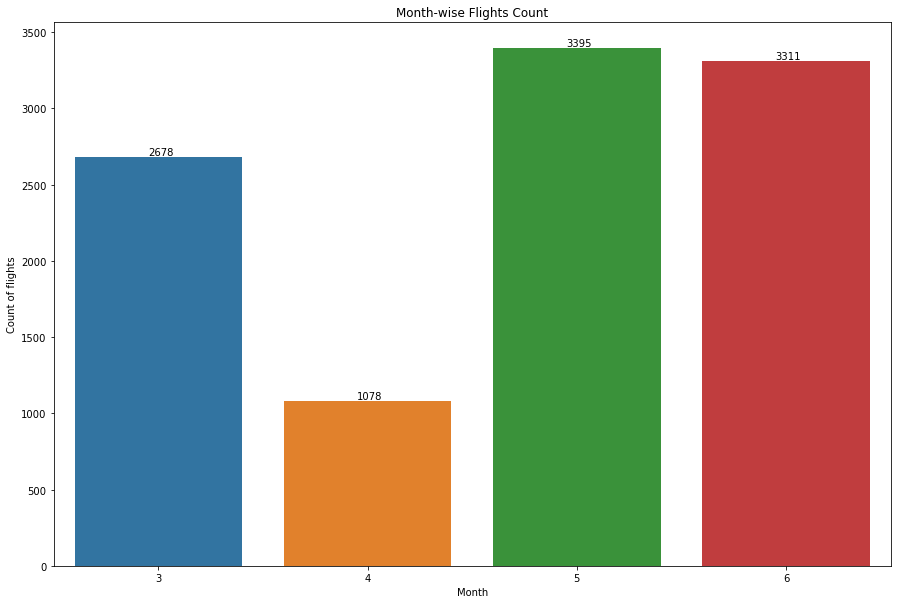

In [14]:
plt.figure(figsize = (15, 10))
plt.title('Month-wise Flights Count')
ax = sns.countplot(x = 'Month_of_Journey', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.35, p.get_height()+1), va = 'bottom', color = 'black')

**Observations:**
- The month of 'May' & 'June' have more number of Flights reason could be the 'Summer vacations'.

In [15]:
# Time taken by plane to reach destination is called Duration. It is the differnce betwwen Dep Time and Arrival time


duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [16]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_data['Duration_hours'] = duration_hours
train_data['Duration_minutes'] = duration_mins

# Now we can drop Duration as it is of no use
train_data.drop(['Duration'], axis = 1, inplace = True)

### Handling Categorical Data

In [17]:
# Total_Stops
train_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace = True)

In [18]:
# Unique values in the 'Ariline' column of dataset
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

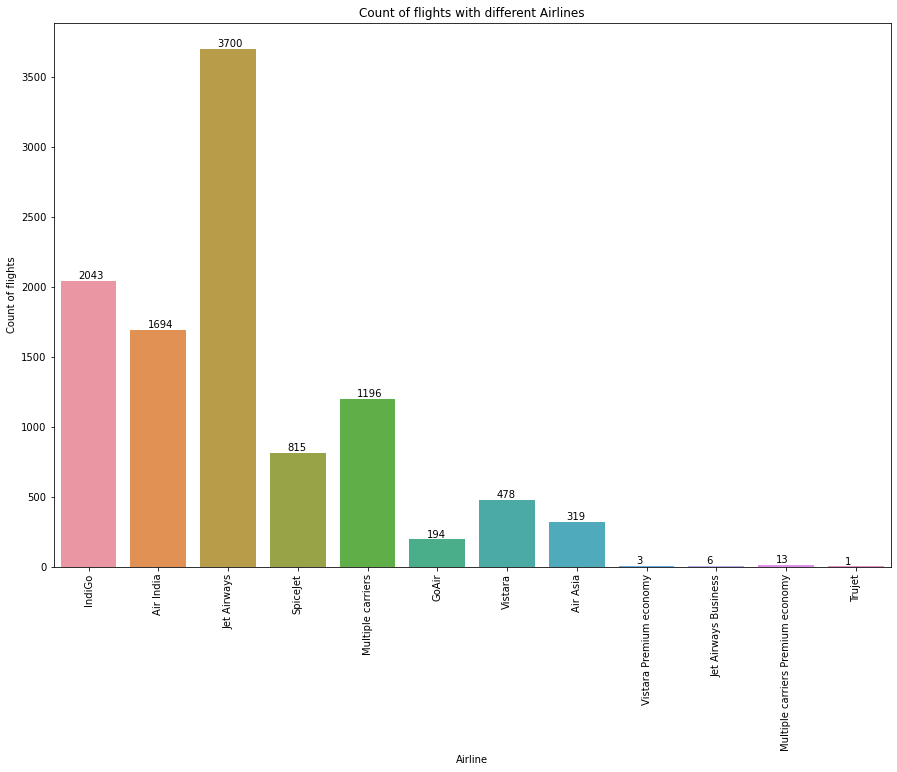

In [19]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax = sns.countplot(x = 'Airline', data = train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color = 'black')

**Observations:**
- There are more number of flights of Jet Airways.
- Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

In [20]:
## As Airline is Nominal Category data we will perform OneHotEncoding we cannot differentiate between categories of 
# Airline we will take get_dummies which is part of OneHotEncoding

Airline = train_data[["Airline"]]

# we will drop first feature which is not required
Airline = pd.get_dummies(Airline, drop_first = True)  
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
# Unique values in the 'Source' column of dataset
train_data["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

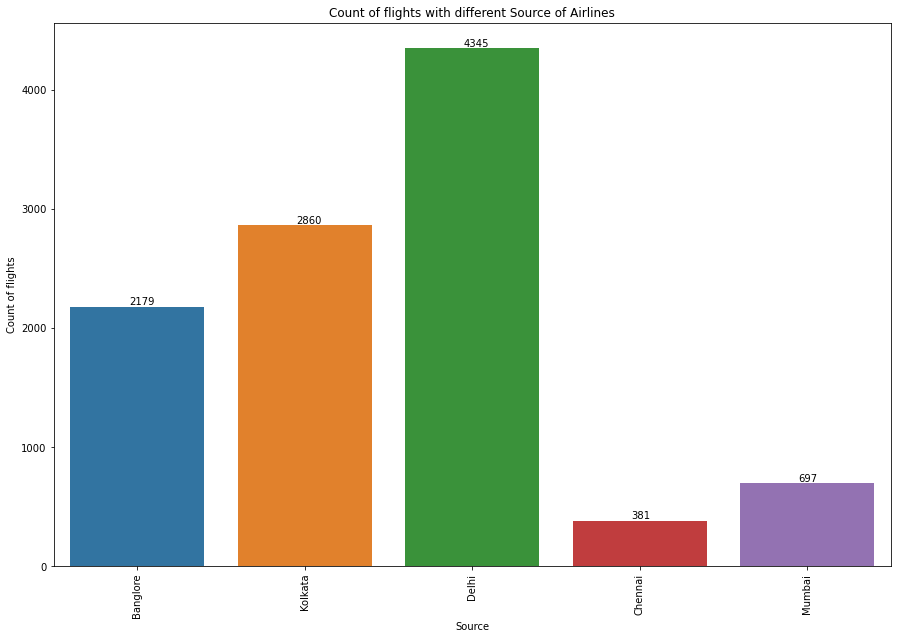

In [22]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Source of Airlines')
ax = sns.countplot(x = 'Source', data = train_data)
plt.xlabel('Source')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.35, p.get_height()+1), va='bottom', color = 'black')

In [23]:
# As Source is Nominal Categorical data we will perform OneHotEncoding, we cannot differentiate between categories of 
# Airline we will take get_dummies which is part of OneHotEncoding

Source = train_data[["Source"]]

# we will drop first feature which is not required
Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
# Unique values in the 'Destination' column of dataset
train_data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

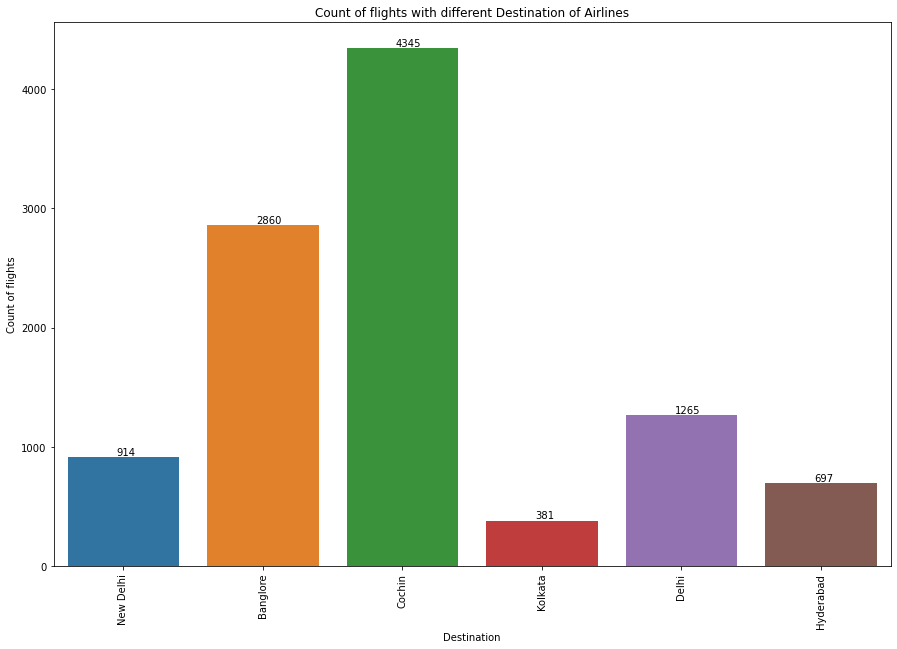

In [25]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Destination of Airlines')
ax = sns.countplot(x = 'Destination', data = train_data)
plt.xlabel('Destination')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.35, p.get_height()+1), va='bottom', color = 'black')

In [26]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding, we cannot differentiate between categories of 
# Airline we will take get_dummies which is part of OneHotEncoding

Destination = train_data[["Destination"]]

# we will drop first feature which is not required
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
# Unique values in the 'Additional_Info' column of dataset
train_data["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

**Observations:**
- As in Additional_Info most of the values have no Info so we can drop them Directly

In [28]:
# Concatenate dataframe --> train_data + Airline + Source + Destination 

train_data = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [29]:
# we will drop the below columns which are not required now
train_data.drop(["Airline", "Source", "Destination", "Additional_Info", "Route"], axis = 1, inplace = True)

In [30]:
train_data.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [31]:
train_data.shape

(10462, 30)

# For Test Data

In [32]:
test_data = pd.read_excel("test_data.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [33]:
# Preprocessing same as training data that we have done

print("Test Data Info")
print("-"* 110)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*110)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

print()
print()
# Checking for Duplicates in the dataset
print("Duplicate Values :")
print("-"*110)
test_data.drop_duplicates(inplace = True)

print()
print()
# Feature Engineering

# Date_of_Journey
test_data["Day_of_Journey"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Month_of_Journey"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    # Check if duration contains only hour or mins
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adds 0 minute
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adds 0 hour
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extract hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    # Extracts only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_minutes"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

print()

# Categorical data

print("Airline")
print("-"*110)
Airline = test_data[["Airline"]]
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(Airline, drop_first= True)

print()

print("Source")
print("-"*110)
Source = test_data[["Source"]]
print(test_data["Source"].value_counts())
Source = pd.get_dummies(Source, drop_first= True)

print()

print("Destination")
print("-"*110)
Destination = test_data[["Destination"]]
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(Destination, drop_first = True)

print()

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)

test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", test_data.shape)

Test Data Info
--------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
--------------------------------------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source    

In [34]:
train_data.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [35]:
train_data.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [36]:
test_data.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
test_data.columns

Index(['Total_Stops', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

**Observations:**
- As the number of columns differ in Train & Test data we have to remove one feature from Train data i.e **'Airline_Trujet'**

In [38]:
train_data.drop(columns = ['Airline_Trujet'], inplace = True)

In [39]:
train_data.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


### Bivariate Analysis

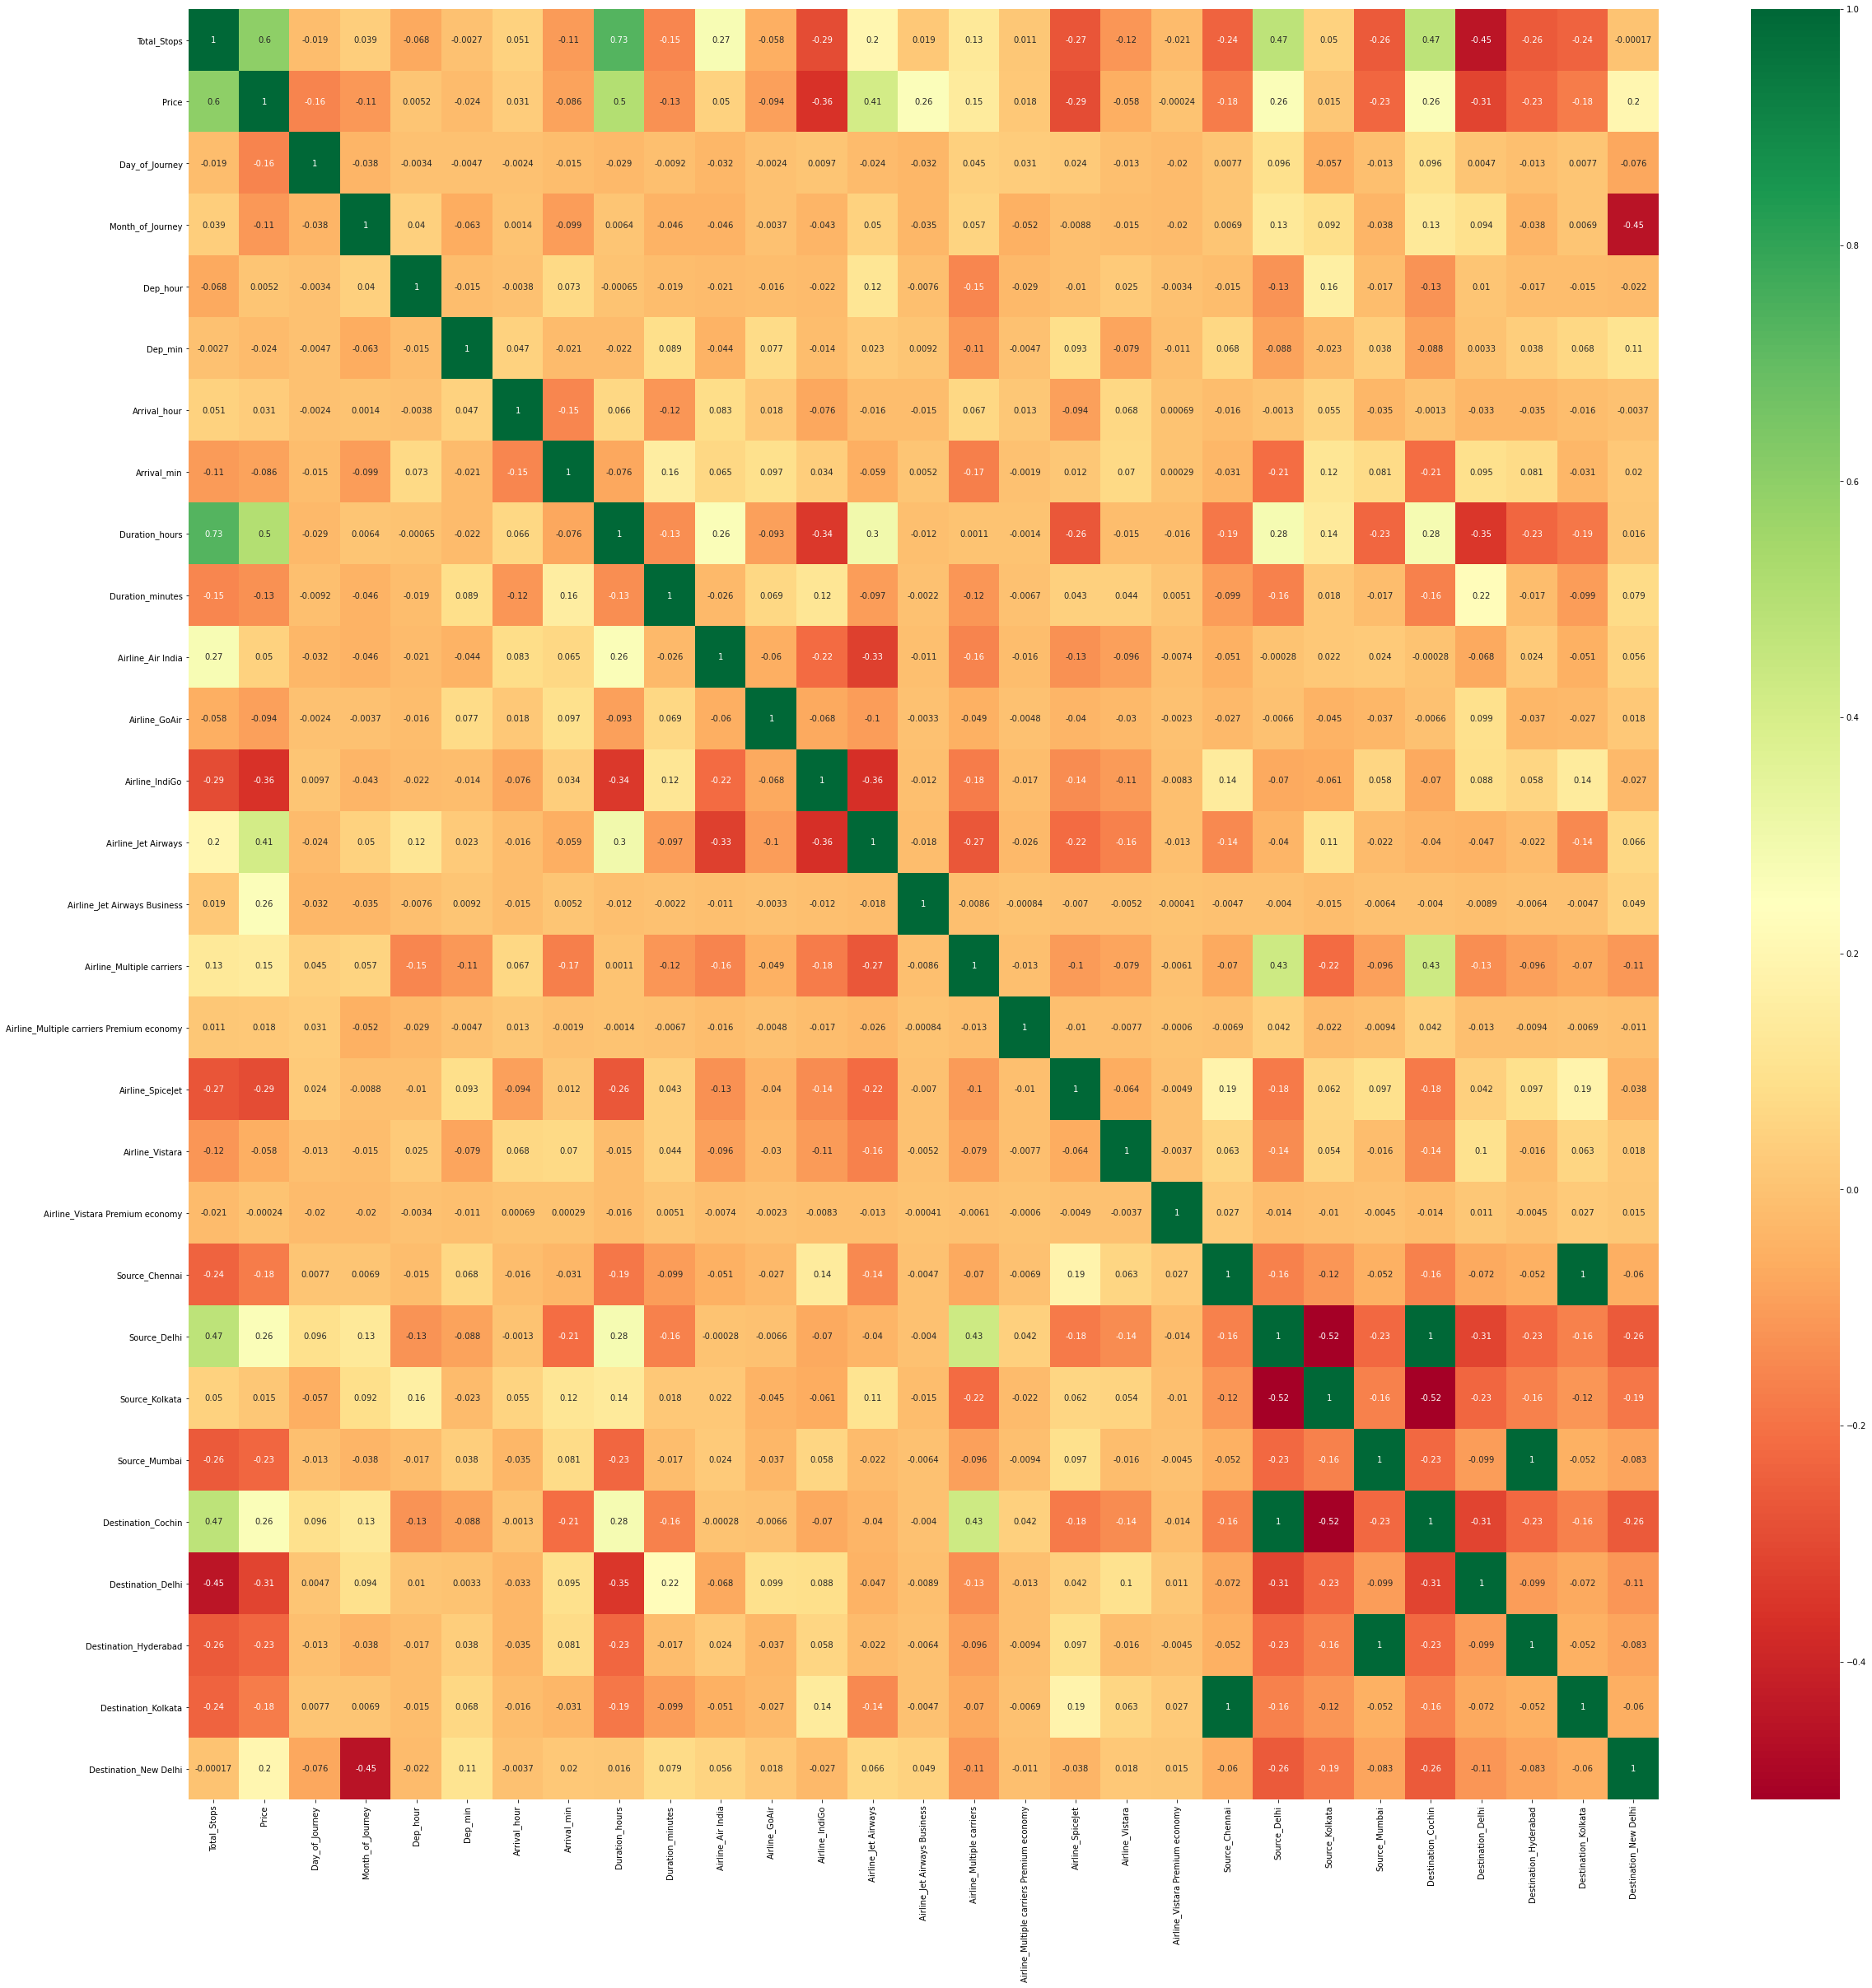

In [40]:
# Finds correlation between Independent attributes

plt.figure(figsize = (40,40))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

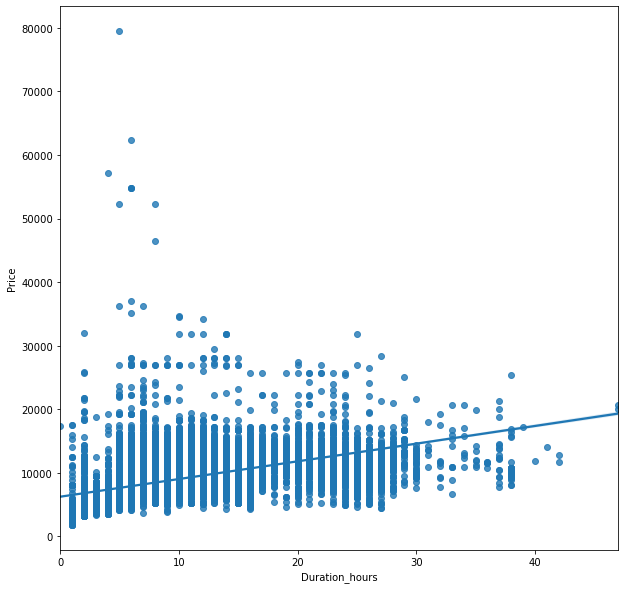

In [41]:
# Bi-variate Analysis on 'Duration_Hours' & 'Price'
fig, ax = plt.subplots(figsize = (10,10))
sns.regplot(x = 'Duration_hours', y = 'Price', data = train_data, ax = ax)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

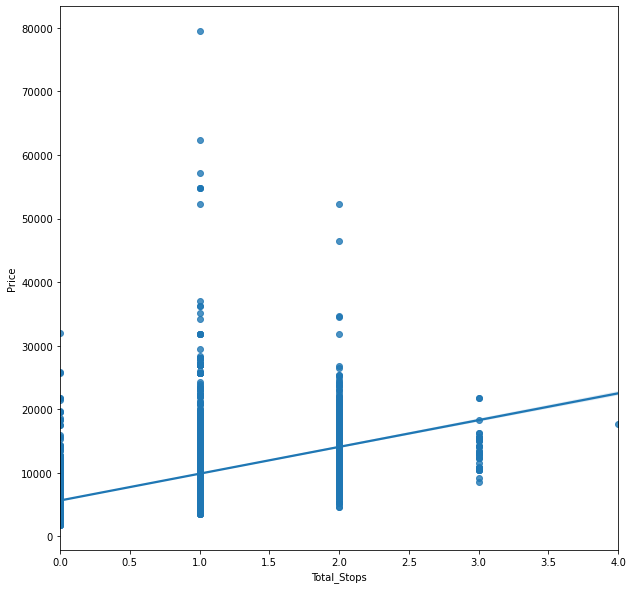

In [42]:
# Bi-variate Analysis on 'Total_Stops' & 'Price'
fig, ax = plt.subplots(figsize = (10,10))
sns.regplot(x = 'Total_Stops', y = 'Price', data = train_data, ax = ax)

### Train-Test Splitting

In [43]:
x = train_data.drop(['Price'], axis = 1)
x.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
y = train_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Identifying Feature Importances

In [45]:
# Important feature using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [46]:
# Printing Feature Importance Scores
print(selection.feature_importances_)

[2.52162595e-01 1.44827457e-01 5.29753827e-02 2.36671443e-02
 2.12487360e-02 2.90370112e-02 1.92333531e-02 1.15883090e-01
 1.71608209e-02 9.54105212e-03 1.73424373e-03 1.64330722e-02
 1.28024329e-01 6.80661958e-02 2.05405688e-02 9.57684183e-04
 3.18435345e-03 5.11089117e-03 7.50484659e-05 5.08356919e-04
 8.47550154e-03 3.30584532e-03 5.39843364e-03 9.84146279e-03
 1.03219632e-02 6.09465284e-03 4.68306528e-04 2.57224485e-02]


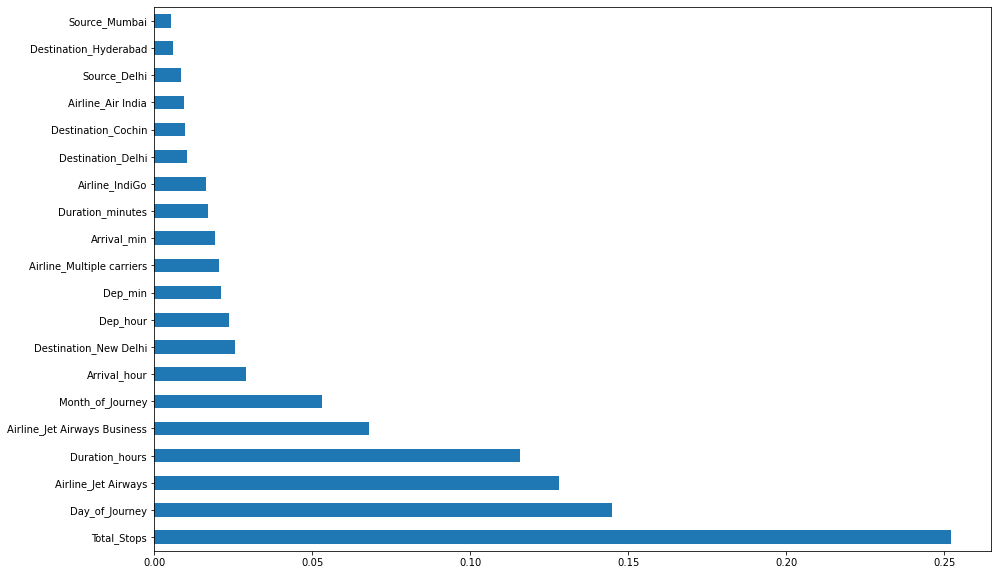

In [47]:
# Plotting Feature Importance Scores (top 20)
plt.figure(figsize = (15,10))
imp_features = pd.Series(selection.feature_importances_, index = x.columns)
imp_features.nlargest(20).plot(kind = 'barh')
plt.show()

In [48]:
# Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 3. Modeling

## 3.1 Linear Regression Model

In [49]:
# Linear Regression
LR = LinearRegression()

# Train the model
LR.fit(x_train, y_train)

# Making Predictions
y_pred = LR.predict(x_test)

In [50]:
# Performance Evaluation
print("Score on Train Data           :", LR.score(x_train, y_train))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error  (MSE)     :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error (R2)          :', metrics.r2_score(y_test, y_pred))

Score on Train Data           : 0.6322132189992657
Mean Absolute Error (MAE)     : 1998.8015816820732
Mean Squared Error  (MSE)     : 8678736.397814015
Root Mean Squared Error (RMSE): 2945.9695174617837
R Squared Error (R2)          : 0.5837591674799267


## 3.2 Regularization Model - Ridge Regression

In [51]:
# Ridge Regression
RDG = Ridge()

# Hyper-parameter Tuning
ridge_param = {'max_iter':[3000],'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]}
grid_ridge_model = GridSearchCV(RDG, ridge_param, cv = 5)

#Train the model
grid_ridge_model.fit(x_train, y_train)

# Making Predictions
y_pred = grid_ridge_model.predict(x_test)
print ("Best Parameters : ",grid_ridge_model.best_params_)

Best Parameters :  {'alpha': 0.1, 'max_iter': 3000}


In [52]:
# Performance Evaluation
print("Score on Train Data           :", grid_ridge_model.score(x_train, y_train))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error  (MSE)     :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error (R2)          :', metrics.r2_score(y_test, y_pred))

Score on Train Data           : 0.6321915695198226
Mean Absolute Error (MAE)     : 1998.946531130413
Mean Squared Error  (MSE)     : 8677964.483653624
Root Mean Squared Error (RMSE): 2945.838502642944
R Squared Error (R2)          : 0.5837961892510727


## 3.3 Regularization Model - Lasso Regression

In [53]:
# Lasso Regression
Lasso = Lasso()

# Hyper-parameter Tuning
lasso_param = {'max_iter':[3000],'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]}
grid_lasso_model = GridSearchCV(Lasso, lasso_param, cv = 5)

# Train the model
grid_lasso_model.fit(x_train, y_train)

# Making Predictions
y_pred = grid_lasso_model.predict(x_test)
print ("Best Parameters : ",grid_lasso_model.best_params_)

Best Parameters :  {'alpha': 0.1, 'max_iter': 3000}


In [54]:
# Performance Evaluation
print("Score on Train Data           :", grid_lasso_model.score(x_train, y_train))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error  (MSE)     :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error (R2)          :', metrics.r2_score(y_test, y_pred))

Score on Train Data           : 0.632209749000699
Mean Absolute Error (MAE)     : 1998.782615480723
Mean Squared Error  (MSE)     : 8678532.989198208
Root Mean Squared Error (RMSE): 2945.9349940550637
R Squared Error (R2)          : 0.5837689231595216


## 3.4 Random Forest Regressor

In [55]:
## Hyper-parameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [56]:
# Random Forest Regression
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose = 2, random_state = 42, n_jobs = -1)

# Train the model
rf_random.fit(x_train, y_train)

# Making Predictions
y_pred = rf_random.predict(x_test)
print ("Best Parameters : ",rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.6min finished


Best Parameters :  {'n_estimators': 190, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [57]:
# Performance Evaluation
print("Score on Train Data           :", rf_random.score(x_train, y_train))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error  (MSE)     :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error (R2)          :', metrics.r2_score(y_test, y_pred))

Score on Train Data           : 0.9144728569302083
Mean Absolute Error (MAE)     : 1138.4231570987608
Mean Squared Error  (MSE)     : 3500099.929930609
Root Mean Squared Error (RMSE): 1870.8554005936987
R Squared Error (R2)          : 0.8321317249473409


## 3.5 Ensemble Model - Gradient Boosting

In [58]:
## Hyper-parameter Tuning

# Alpha values
alpha = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.9]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 15, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'alpha' : alpha}

In [59]:
# Use the random grid to search for best hyperparameters

# Gradient Boosted Regression
gb = GradientBoostingRegressor()

# Random search of parameters, using 3 fold cross validation, 
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state = 42, n_jobs = -1)

# Train the model
gb_random.fit(x_train, y_train)

# Making Predictions
pred = gb_random.predict(x_test)

print ("Best Parameters : ",gb_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


Best Parameters :  {'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'alpha': 0.01}


In [60]:
# Performance Evaluation
print("Score on Train Data           :", gb_random.score(x_train, y_train))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error  (MSE)     :', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R Squared Error (R2)          :', metrics.r2_score(y_test, pred))

Score on Train Data           : 0.9609701670355919
Mean Absolute Error (MAE)     : 1255.906601341466
Mean Squared Error  (MSE)     : 4356626.5721567
Root Mean Squared Error (RMSE): 2087.2533560056145
R Squared Error (R2)          : 0.7910518549877451


# 4. End Results

In [61]:
print ("R Squared Error   -  R2 ")
print ("---------------------------------------------------------------------------------------------------------------")
print ("Linear Regression Model                 -    R Squared Value For Linear Regression Train :: 0.5837544362210152")
print ("Regularization Model - Ridge Regression -    R Squared Value For Linear Regression Train :: 0.5837909544588218")
print ("Regularization Model - Lasso Regression -    R Squared Value For Linear Regression Train :: 0.5837650348557331")
print ("Random Forest Regressor                 -    R Squared Value For Linear Regression Train :: 0.8317659189007600")
print ("Ensemble Model - Gradient Boosting      -    R Squared Value For Linear Regression Train :: 0.7845658805842721")
print ("---------------------------------------------------------------------------------------------------------------")

R Squared Error   -  R2 
---------------------------------------------------------------------------------------------------------------
Linear Regression Model                 -    R Squared Value For Linear Regression Train :: 0.5837544362210152
Regularization Model - Ridge Regression -    R Squared Value For Linear Regression Train :: 0.5837909544588218
Regularization Model - Lasso Regression -    R Squared Value For Linear Regression Train :: 0.5837650348557331
Random Forest Regressor                 -    R Squared Value For Linear Regression Train :: 0.8317659189007600
Ensemble Model - Gradient Boosting      -    R Squared Value For Linear Regression Train :: 0.7845658805842721
---------------------------------------------------------------------------------------------------------------


**Observations:**
- As the R2 is **Highest** for **Random Forest Regressor**, we will select it for **Predicting** the Values for **Test Data.**

# 5. Prediction

<AxesSubplot:ylabel='Density'>

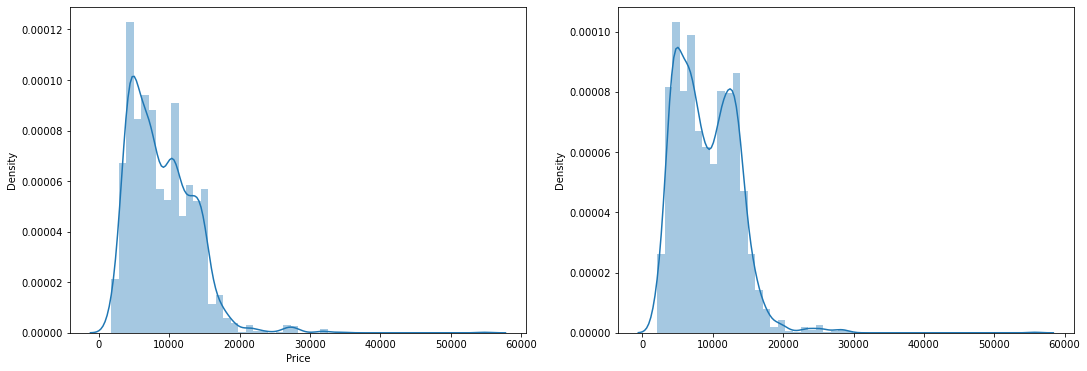

In [63]:
# Predicting values for Test Data

pred_test_data = gb_random.predict(test_data)
fig,(ax1,ax2)= plt.subplots(figsize = (18,6), ncols = 2)
sns.distplot(y_test, ax = ax1, bins = 50)
sns.distplot(pred_test_data, ax = ax2, bins = 50)

1. After comparing the **Distributions of train and test results** it has been observed that both the distributions **looks identical.** 
2. It confirms visually that our model **does not make really bad predictions** also **does not** suffers from the problem of **overfitting.**
3. "Random Forest Regressor - R Squared Value For Linear Regression Train :: 0.8317659189007600"

# 6. Final Submission

In [66]:
final_submission = test_data
final_submission['Predicted_Price'] = pred_test_data
final_submission.to_csv('Flight_Fare_Prediction.csv', index = False)

# End of File